In [1]:
import numpy as np
import pandas as pd

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#To plot the graph embedded in the notebook
%matplotlib inline

In [2]:
#imports from sklearn library

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
data = np.loadtxt('sea_data.txt')
# data = data.astype('float64')
# print(data)

In [11]:
#extract the sea level at each time frame from the dataset
X_year = data[:, 2]
Y_level = data[:, 5]

X_year = X_year.reshape(-1, 1)
Y_level = Y_level.reshape(-1, 1)

# print(X_level)
# print(Y_level)


Text(0, 0.5, 'Sea Level with respect to 20-year mean reference')

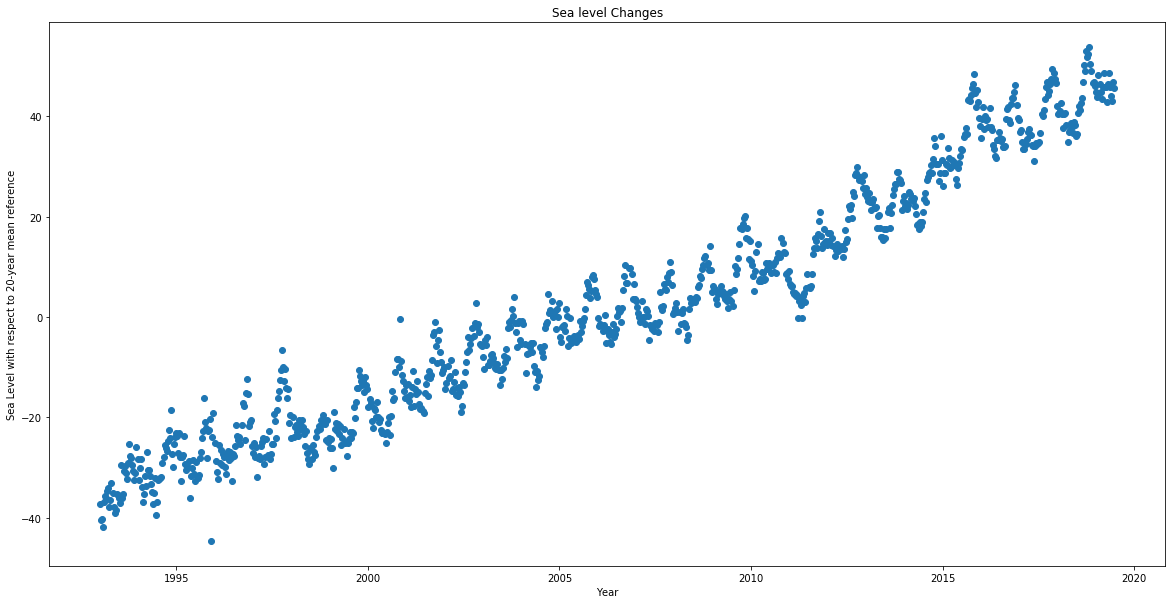

In [20]:
#plotting the data
plt.figure(figsize=(20, 10))
plt.scatter(X_year, Y_level, marker='o')
plt.title("Sea level Changes")
plt.xlabel("Year")
plt.ylabel("Sea Level with respect to 20-year mean reference")


In [18]:
#perform regression on the dataset using numpy regression function and predict the vale for 2020 
reg = LinearRegression().fit(X_year, Y_level)

Y_next = reg.predict(np.array([[2020.000]]))

print(Y_next)

[[43.41289414]]


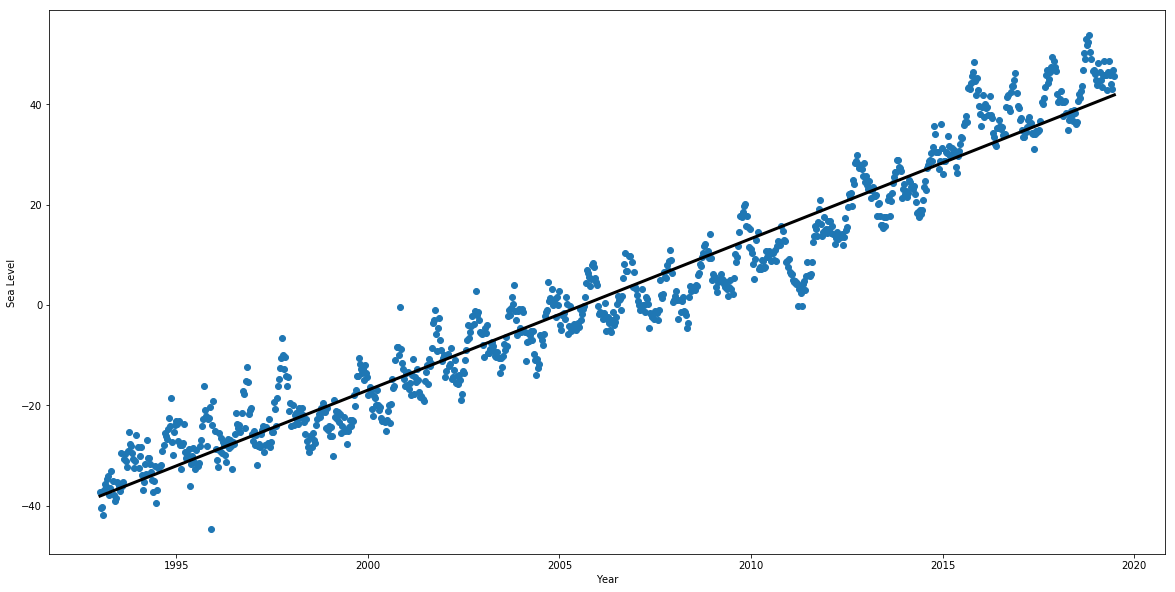

In [21]:
#plot the trendline
plt.figure(figsize=(20, 10))
prediction_space = np.linspace(min(X_year), max(X_year)).reshape(-1,1) 
plt.scatter(X_year,Y_level)
plt.plot(prediction_space, reg.predict(prediction_space), color = 'black', linewidth = 3)
plt.ylabel('Sea Level')
plt.xlabel('Year')
plt.show()


In [22]:
#get rmse and r2 scores

Y_pred = reg_all.predict(X_year)

rmse = np.sqrt(mean_squared_error(Y_level, Y_pred))
r2 = r2_score(Y_level, Y_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")



The model performance for training set
--------------------------------------
RMSE is 5.543561155261778
R2 score is 0.9455556875915986




In [53]:
#perform regression and prediction again using manual stochastic gradient descent this time
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperperameters
m = 10


# print(X_year.shape)
# print(Y_level.shape)

X_b = np.c_[np.ones(X_year.shape), X_year] #add x_0 = 1 to each instance

# print(X_b[0])
# print(X_b.shape)

def learning_schedule(t): 
    return t0 / (t + t1)

theta = np.random.randn(2,1) #random initialization of both m and c simultaneously

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        X_b = X_b[random_index:random_index+1]
        Y_rand = Y_level[random_index:random_index+1]
        gradients = 2 * X_b.T.dot(X_b.dot(theta) - Y_rand)       
        
        eta = learning_schedule(epoch * m + i)

        theta = theta - eta * gradients
                                     
    
print(theta)



[[1.77050112e+02]
 [3.52613124e+05]]


In [34]:
#plot the trendline again

In [ ]:
#get rmse and r2 scores

In [15]:
#adjusted gradient descent 

In [ ]:
#plot the trendline again 

In [ ]:
#print rmse and r2 scores 